In [2]:

# This library is used to read and write into Google Sheets from Python
import gspread
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# This library is used to maniputlate the extracted data from source.
import pandas as pd
import numpy as np
# ----------------------------------------------------------------------------------------------
# This is a date parser library
from dateutil import parser
# ----------------------------------------------------------------------------------------------
# This library is used to extract location information from text.
from geotext import GeoText
# ----------------------------------------------------------------------------------------------
# This is a regular expression library
import re
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# This library is used to detect the text of the language
from langdetect import detect, DetectorFactory
# ----------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------
# This library is used to extract the language description from lanugage code. To fetch 
# description from two letter language code use pycountry and if it is a four letter code that 
# contains language code and region code then use babel's locale.
import pycountry
from babel import Locale
from textblob import TextBlob
# from cld2 import detect
# ----------------------------------------------------------------------------------------------
# The below library is used to extract country info from inconsistent location column
import geonamescache  # For gazetteer
import spacy  # For NER
# ----------------------------------------------------------------------------------------------
# This library is used to fuzzy match location
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
# ----------------------------------------------------------------------------------------------
# The below libraries are used to train and test the models
# # Import models
# ----------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification


import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
# import torch
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize

# ----------------------------------------------------------------------------------------------
# !python -m spacy download en_core_web_sm - This is done - Downloaded and installed and need not to run this line. 
# ----------------------------------------------------------------------------------------------
import nltk
# import tensorflow as tf
# nltk.download("punkt")
nlp = spacy.load("en_core_web_sm")

In [122]:
%run Review_Raw_Data_Analysis.py


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review          6393 non-null   object
 1   date            6448 non-null   object
 2   Location        1711 non-null   object
 3   review_english  6393 non-null   object
 4   dt              6448 non-null   object
 5   dat             6448 non-null   object
dtypes: object(6)
memory usage: 302.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review          6393 non-null   object
 1   date            6448 non-null   object
 2   Location        1711 non-null   object
 3   review_english  6393 non-null   object
 4   dt              6448 non-null   object
 5   dat             6448 non-null   object
dtypes: object(6)
memory usage: 302.4

In [181]:

df_preprocess = pd.read_csv('Path/reivew_data.csv',index_col=False, encoding='ISO-8859-1')
filtered_df = df_preprocess.copy()
# Column: review transformation

filtered_df = filtered_df.rename(columns = {
    'Review': 'review', 
    'Location': 'location'
    })

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          6393 non-null   object
 1   date            6448 non-null   object
 2   location        1711 non-null   object
 3   review_english  6393 non-null   object
 4   dt              6448 non-null   object
 5   dat             6448 non-null   object
dtypes: object(6)
memory usage: 302.4+ KB


In [182]:

print(filtered_df['review'].isna().sum())
# filtered_df['review'] = filtered_df['review'].apply(lambda x: x.encode('utf-8').decode('utf-8') if isinstance(x, str) else x )
print(filtered_df.info())
def clean_text(text):
    # Remove non-printable characters and extra spaces  
    text = re.sub(r'[^[:print:]]+', '', text)    
    # Remove extra spaces and convert to lowercase     
    text = re.sub(r'\n+', '', text).lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\x00-\x7F]', '', text)
    return text

# Custom function to check if a string contains only spaces
def is_only_spaces(s):
    return s.isspace() and len(s.strip()) == 0
    

import pandas as pd

def clean_and_filter_text_column(df, text_column, clean_text_function):
    """
    Cleans and filters a text column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        text_column (str): The name of the text column to clean and filter.
        clean_text_function (function): A function that takes a string as input 
                                        and returns a cleaned string.

    Returns:
        None (modifies the DataFrame in-place)
    """

    # Apply Encoding and Decoding
    df[text_column].apply(lambda x: x.encode('utf-8').decode('utf-8') if isinstance(x, str) else x )
    
    # Apply cleaning function to text values
    df[text_column] = df[text_column].apply(lambda x: clean_text_function(x) if isinstance(x, str) else x)

    # Replace empty strings with NaN
    df[text_column] = df[text_column].str.strip().replace('', pd.NA)

    # Drop rows with NaN values
    df.dropna(subset=[text_column], inplace=True)

    # Reset index
    df.reset_index(drop=True, inplace=True) 
    
    

# filtered_df = filtered_df
clean_and_filter_text_column(filtered_df, 'review', clean_text)


print(filtered_df.info())
print(filtered_df['review'].isna().sum())





55
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          6393 non-null   object
 1   date            6448 non-null   object
 2   location        1711 non-null   object
 3   review_english  6393 non-null   object
 4   dt              6448 non-null   object
 5   dat             6448 non-null   object
dtypes: object(6)
memory usage: 302.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          6392 non-null   object
 1   date            6392 non-null   object
 2   location        1704 non-null   object
 3   review_english  6392 non-null   object
 4   dt              6392 non-null   object
 5   dat             6392 non-null   object
dtypes: object(6)
memory usage: 29

In [184]:

pd.options.display.max_rows = 6500
# filtered_df.info()
filtered_df['date']


0       2019/08/20
1       2019/08/20
2       2019/08/20
3       2019/08/20
4       2019/08/19
5       2019/08/19
6       2019/08/19
7       2019/08/19
8       2019/08/19
9       2019/08/19
10      2019/08/19
11      2019/08/19
12      2019/08/19
13      2019/08/19
14      2019/08/19
15      2019/08/19
16      2019/08/19
17      2019/08/19
18      2019/08/19
19      2019/08/19
20      2019/08/18
21      2019/08/18
22      2019/08/18
23      2019/08/18
24      2019/08/18
25      2019/08/18
26      2019/08/17
27      2019/08/17
28      2019/08/17
29      2019/08/17
30      2019/08/17
31      2019/08/17
32      2019/08/17
33      2019/08/17
34      2019/08/17
35      2019/08/16
36      2019/08/16
37      2019/08/16
38      2019/08/15
39      2019/08/15
40      2019/08/15
41      2019/08/15
42      2019/08/15
43      2019/08/15
44      2019/08/14
45      2019/08/14
46      2019/08/14
47      2019/08/14
48      2019/08/14
49      2019/08/14
50      2019/08/13
51      2019/08/13
52      2019

In [185]:
# Colummn: Date Transfromation
# from dateutil import parser
# import pandas as pd

# Sample DataFrame with different date formats
# dfdt = pd.DataFrame({
#     'date': ['31-12-21', '01-01-2022', 'Mar-21', 'Apr-2021', 'Aug 2021']
# })

# Function to parse different date formats
def parse_date(date_str):
    # Handle complete dates (day-month-year)
    # , "%Y-%d-%m", "%y-%d-%m", "%y/%m/%d", "%Y/%m/%d"
    for fmt in ("%d-%m-%y", "%d-%m-%Y", "%m-%d-%y", "%m-%d-%Y", "%d/%m/%y", "%d/%m/%Y", "%m/%d/%y", "%m/%d/%Y", "%Y-%d-%m", "%y-%d-%m", 
                "%y/%m/%d", "%Y/%m/%d"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass

    # Handle month-year formats
    for fmt in ("%b-%y", "%b-%Y", "%b-%y%", "%b-%Y%", "%b %y", "%b %Y", "%b %y%", "%b %Y%" ):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    
    # Return None if all parsing attempts fail
    return None



filtered_df['date'] = filtered_df['date'].apply(parse_date)



# Print the DataFrame with 'date' column converted to datetime

print(filtered_df['date'])


0      2019-08-20
1      2019-08-20
2      2019-08-20
3      2019-08-20
4      2019-08-19
5      2019-08-19
6      2019-08-19
7      2019-08-19
8      2019-08-19
9      2019-08-19
10     2019-08-19
11     2019-08-19
12     2019-08-19
13     2019-08-19
14     2019-08-19
15     2019-08-19
16     2019-08-19
17     2019-08-19
18     2019-08-19
19     2019-08-19
20     2019-08-18
21     2019-08-18
22     2019-08-18
23     2019-08-18
24     2019-08-18
25     2019-08-18
26     2019-08-17
27     2019-08-17
28     2019-08-17
29     2019-08-17
30     2019-08-17
31     2019-08-17
32     2019-08-17
33     2019-08-17
34     2019-08-17
35     2019-08-16
36     2019-08-16
37     2019-08-16
38     2019-08-15
39     2019-08-15
40     2019-08-15
41     2019-08-15
42     2019-08-15
43     2019-08-15
44     2019-08-14
45     2019-08-14
46     2019-08-14
47     2019-08-14
48     2019-08-14
49     2019-08-14
50     2019-08-13
51     2019-08-13
52     2019-08-13
53     2019-08-13
54     2019-08-13
55     201

In [186]:
# Setting the seed for consistent language detection results
DetectorFactory.seed = 0

# Function to detect the language of a text
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
def detect_language_text_blob(text): 
    try:
        return TextBlob(text)
    except:
        return 'unknown'


# review = filtered_df['review']
# review_df= pd.DataFrame(review)

# Add a new column with the detected language for each row
filtered_df['review_language'] = filtered_df['review'].apply(detect_language)

# filtered_df['review_language']


In [187]:
filtered_df['iso_639-1_lang_code'] = pd.DataFrame(filtered_df[['review_language']])

def get_iso_639_1_code(lang_code):
#     clean_text(lang_code)
    if (lang_code.upper() == 'UNKNOWN'): return
#     if lang_code == None or lang_code.upper() == 'unknown': return 'unknown'
    try:
        # Attempt to parse the locale to handle complex codes (e.g., 'zh-cn')
        locale = Locale.parse(lang_code, sep='-')
        # Use the parsed locale to fetch the two-letter language code
        lang = pycountry.languages.get(alpha_2=locale.language)
        # Return the ISO 639-1 two-letter code
        return lang.alpha_2
#       return lang.alpha_2 if (len(lang.alpha_2) == 2 ) else 'unknown'
    except (ValueError, AttributeError):
        # Fallback for when the code cannot be parsed or matched
        # Attempt direct match with pycountry in case of simple codes
        try:
            lang = pycountry.languages.get(alpha_2=lang_code)
            return lang.alpha_2
#             return lang.alpha_2 if (len(lang.alpha_2) == 2 ) else 'unknown'
        except AttributeError:
            # Return original code if no match is found
            return lang_code
            

# Apply the function to map to ISO 639-1 codes
filtered_df['iso_639-1_lang_code'] = filtered_df['iso_639-1_lang_code'].apply(get_iso_639_1_code)

# print(filtered_df)

In [188]:
# Define a function to extract language descriptions using pycountry
def get_language_description(code):
    if code == None: return
    language = pycountry.languages.get(alpha_2=code)
    return language.name if language else 'Unknown'

# Apply the function to the DataFrame column
filtered_df['language_description'] = filtered_df['iso_639-1_lang_code'].apply(get_language_description)





In [189]:
filtered_df.head()

review       date     location  \
0  i was very impressed with the resort great sta... 2019-08-20    Sebastian   
1  the rooms were nice the outside needs work als... 2019-08-20  Los Angeles   
2  great location i have stayed at this hotel on ... 2019-08-20      Georgia   
3  the hotel was adequate for my stay the strips ... 2019-08-20          NaN   
4  great location room was large and spacious par... 2019-08-19  Palm Harbor   

                                      review_english         dt       dat  \
0  I was very impressed with the resort.\n Great ...  8/20/2019  Aug-2019   
1  The rooms were nice the outside needs work als...  8/20/2019  Aug-2019   
2  Great location! I have stayed at this hotel on...  8/20/2019  Aug-2019   
3  The hotel was adequate for my stay. The strips...  8/20/2019  Aug-2019   
4  Great location, room was large and spacious. P...  8/19/2019  Aug-2019   

  review_language iso_639-1_lang_code language_description  
0              en                  en              English  
1              en                  en              English  
2              en                  en              English  
3              en                  en              English  
4              en                  en              English

In [190]:
# preprocessed_df = filtered_df[['review', 'date', 'iso_639-1_lang_code' , 'language_description', 'review_english']]
preprocessed_df = filtered_df.copy()
preprocessed_df.drop('location', axis = 1, inplace = True)
preprocessed_df.reset_index(drop = True, inplace = True)
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review                6392 non-null   object        
 1   date                  6392 non-null   datetime64[ns]
 2   review_english        6392 non-null   object        
 3   dt                    6392 non-null   object        
 4   dat                   6392 non-null   object        
 5   review_language       6392 non-null   object        
 6   iso_639-1_lang_code   6392 non-null   object        
 7   language_description  6392 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 399.6+ KB


In [191]:
preprocessed_df.head()

review       date  \
0  i was very impressed with the resort great sta... 2019-08-20   
1  the rooms were nice the outside needs work als... 2019-08-20   
2  great location i have stayed at this hotel on ... 2019-08-20   
3  the hotel was adequate for my stay the strips ... 2019-08-20   
4  great location room was large and spacious par... 2019-08-19   

                                      review_english         dt       dat  \
0  I was very impressed with the resort.\n Great ...  8/20/2019  Aug-2019   
1  The rooms were nice the outside needs work als...  8/20/2019  Aug-2019   
2  Great location! I have stayed at this hotel on...  8/20/2019  Aug-2019   
3  The hotel was adequate for my stay. The strips...  8/20/2019  Aug-2019   
4  Great location, room was large and spacious. P...  8/19/2019  Aug-2019   

  review_language iso_639-1_lang_code language_description  
0              en                  en              English  
1              en                  en              English  
2              en                  en              English  
3              en                  en              English  
4              en                  en              English

In [192]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review                6392 non-null   object        
 1   date                  6392 non-null   datetime64[ns]
 2   review_english        6392 non-null   object        
 3   dt                    6392 non-null   object        
 4   dat                   6392 non-null   object        
 5   review_language       6392 non-null   object        
 6   iso_639-1_lang_code   6392 non-null   object        
 7   language_description  6392 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 399.6+ KB


In [193]:
len(preprocessed_df['review'].isna())

6392

In [194]:
print(filtered_df['language_description'].unique())
len(filtered_df['language_description'].value_counts())

['English' 'Spanish' 'French' 'Italian' 'German' 'Dutch' 'Swedish'
 'Danish' 'Portuguese' 'Norwegian' 'Catalan' 'Finnish' 'Estonian'
 'Afrikaans' 'Polish']


15

In [195]:
filtered_df['language_description'].value_counts()

language_description
English       5930
Spanish        168
German          75
French          73
Italian         37
Portuguese      32
Dutch           25
Danish          19
Norwegian       12
Swedish          8
Finnish          4
Catalan          3
Afrikaans        3
Polish           2
Estonian         1
Name: count, dtype: int64

In [196]:
print(filtered_df['review'].isna().sum())
print(filtered_df['review'].isnull().sum())

0
0


In [197]:

process_df = filtered_df.copy()


preprocessed_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review                6392 non-null   object        
 1   date                  6392 non-null   datetime64[ns]
 2   review_english        6392 non-null   object        
 3   dt                    6392 non-null   object        
 4   dat                   6392 non-null   object        
 5   review_language       6392 non-null   object        
 6   iso_639-1_lang_code   6392 non-null   object        
 7   language_description  6392 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 399.6+ KB


In [198]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string


# Drop unnecessary columns
preprocessed_df = preprocessed_df.drop(columns=['date', 'iso_639-1_lang_code', 'language_description'])

# 1. Remove stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

preprocessed_df['review_english'] = preprocessed_df['review_english'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# 2. Remove punctuations
preprocessed_df['review_english'] = preprocessed_df['review_english'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# At this point, some 'review_english' could have turned into None (if they contained only stop words and punctuations).
# We replace these None with an empty string
preprocessed_df['review_english'] = preprocessed_df['review_english'].fillna('')

# 3. Tokenize
preprocessed_df['review_english'] = preprocessed_df['review_english'].apply(lambda x: word_tokenize(x))

# 4. Create DTM
count_vect = CountVectorizer()
dtm = count_vect.fit_transform(preprocessed_df['review_english'].apply(lambda x: ' '.join(x)))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhirama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhirama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
# dense_dtm = dtm.toarray()

# # convert to DataFrame
# dtm_df = pd.DataFrame(dense_dtm, columns=count_vect.get_feature_names_out())

# print(dtm_df)

In [100]:
# Convert a subset of the sparse matrix to a DataFrame for inspection
subset_dtm_df = pd.DataFrame(dtm[:100].toarray(), columns=count_vect.get_feature_names_out())
print(subset_dtm_df)

    00  0400  05  063  072818072918  0900  0rox  10  100  1000  ...  zero  \
0    0     0   0    0             0     0     0   0    0     0  ...     0   
1    0     0   0    0             0     0     0   0    0     0  ...     0   
2    0     0   0    0             0     0     0   0    0     0  ...     0   
3    0     0   0    0             0     0     0   0    0     0  ...     0   
4    0     0   0    0             0     0     0   0    0     0  ...     0   
5    0     0   0    0             0     0     0   0    0     0  ...     0   
6    0     0   0    0             0     0     0   0    0     0  ...     0   
7    0     0   0    0             0     0     0   0    0     0  ...     0   
8    0     0   0    0             0     0     0   0    0     0  ...     0   
9    0     0   0    0             0     0     0   0    0     0  ...     0   
10   0     0   0    0             0     0     0   0    0     0  ...     0   
11   0     0   0    0             0     0     0   0    0     0  ...     0   

In [200]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

preprocessed_df['review_english'] = preprocessed_df['review_english'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhirama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [201]:
print(preprocessed_df['review_english'][3])

['The', 'hotel', 'adequate', 'stay', 'The', 'strip', 'bathtub', 'useless', 'I', 'fell', 'taking', 'shower', 'I', 'asked', 'front', 'desk', 'staff', 'several', 'time', 'get', 'bath', 'mat', 'never', 'Management', 'unresponsive', 'request', 'poor', 'someone', 'gone', 'dollar', 'store', 'gotten', 'bath', 'mat', 'Breakfast', 'good', 'would', 'nice', 'yogurt', 'andor', 'cottage', 'cheese', 'buffet', 'Read', 'Read', 'le']


In [202]:
# preprocessed_df[['review', 'review_english', 'iso_639-1_lang_code', 'language_description']]
original_df = process_df[['review', 'date', 'review_english', 'iso_639-1_lang_code' ,'language_description']].copy()

# original_df

sentiment_category
positive    5037
negative    1001
neutral      354
Name: count, dtype: int64
sentiment_category_vader
positive    5054
negative     950
neutral      388
Name: count, dtype: int64
0.24953379224030037
0.5032274718397998
date
2018-08-31    0.240023
2018-09-30    0.261318
2018-10-31    0.238462
2018-11-30    0.266738
2018-12-31    0.257907
2019-01-31    0.244226
2019-02-28    0.271481
2019-03-31    0.235705
2019-04-30    0.254168
2019-05-31    0.244722
2019-06-30    0.227486
2019-07-31    0.241593
2019-08-31    0.264187
Freq: M, Name: sentiment_score_custom, dtype: float64
date
2018-08-31    0.505035
2018-09-30    0.504707
2018-10-31    0.483712
2018-11-30    0.538621
2018-12-31    0.492716
2019-01-31    0.481567
2019-02-28    0.558107
2019-03-31    0.480348
2019-04-30    0.491184
2019-05-31    0.515585
2019-06-30    0.522873
2019-07-31    0.492711
2019-08-31    0.497439
Freq: M, Name: sentiment_score_vader, dtype: float64
(0.2, 0.6]        3116
(-0.2, 0.2]       2290
(0

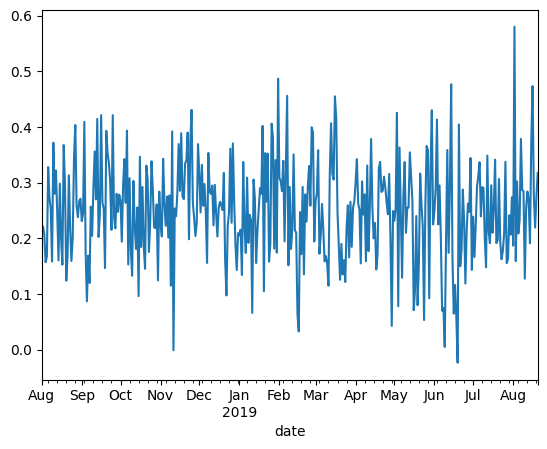

In [203]:
# Sentiment_Analysis with TextBlob and Vader


# Assuming preprocessed_df is your dataframe with the 'review_english' column preprocessed
# and 'date' column representing the date of each review

# Function for custom sentiment analysis using TextBlob
def get_sentiment_custom(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convert list of words to a sentence
    analysis = TextBlob(str(text))  # Ensure text is a string
    return analysis.sentiment.polarity


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming preprocessed_df is your dataframe with the 'review_english' column preprocessed

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function for custom sentiment analysis using VADER
def get_sentiment_vader(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convert list of words to a sentence
    analysis = analyzer.polarity_scores(str(text))  # Ensure text is a string
    return analysis['compound']

# Apply function to get sentiment score for each review
preprocessed_df['sentiment_score_vader'] = preprocessed_df['review_english'].apply(get_sentiment_vader)

preprocessed_df['sentiment_score_vader'] = preprocessed_df['sentiment_score_vader'].round(2)

# Now you can follow the same steps as in the original code to analyze the VADER sentiment scores.

# Apply function to get sentiment score for each review
preprocessed_df['sentiment_score_custom'] = preprocessed_df['review_english'].apply(get_sentiment_custom)

preprocessed_df['sentiment_score_custom'] = preprocessed_df['sentiment_score_custom'].round(2)
# print(combined_df.info())
# Assuming the indexes match, you can combine the dataframes
combined_df = original_df.join(preprocessed_df[['sentiment_score_custom', 'sentiment_score_vader']])
# print(combined_df.info())

# Convert 'date' column to DateTime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Set the 'date' column as the index
combined_df.set_index('date', inplace=True)

# analyzing the sentiment scores
# print(combined_df.info())

# Insight 1: Average sentiment score over the entire dataset using custom sentiment analysis
average_sentiment_custom = combined_df['sentiment_score_custom'].mean()
average_sentiment_vader = combined_df['sentiment_score_vader'].mean()

# Insight 2: Average sentiment score by month using custom sentiment analysis
average_sentiment_by_month_custom = combined_df.resample('M')['sentiment_score_custom'].mean()
average_sentiment_by_month_vader = combined_df.resample('M')['sentiment_score_vader'].mean()
# Insight 3: Distribution of sentiment scores using custom sentiment analysis
sentiment_distribution_custom = combined_df['sentiment_score_custom'].value_counts(bins=5)
sentiment_distribution_vader = combined_df['sentiment_score_vader'].value_counts(bins=5)
# Insight 4: The day with the highest average sentiment score using custom sentiment analysis
best_day_custom = combined_df.groupby('date')['sentiment_score_custom'].mean().idxmax()
best_day_vader = combined_df.groupby('date')['sentiment_score_vader'].mean().idxmax()
# Insight 5: The day with the lowest average sentiment score using custom sentiment analysis
worst_day_custom = combined_df.groupby('date')['sentiment_score_custom'].mean().idxmin()
worst_day_vader = combined_df.groupby('date')['sentiment_score_vader'].mean().idxmin()

# Insight 6: Count of positive, neutral, and negative reviews
combined_df['sentiment_category'] = pd.cut(combined_df['sentiment_score_custom'],
                                           bins=[-1.01, -0.01, 0.01, 1],
                                           labels=['negative', 'neutral', 'positive'])
sentiment_counts_custom = combined_df['sentiment_category'].value_counts()


combined_df['sentiment_category_vader'] = pd.cut(combined_df['sentiment_score_vader'],
                                           bins=[-1.01, -0.01, 0.01, 1],
                                           labels=['negative', 'neutral', 'positive'])
sentiment_counts_vader = combined_df['sentiment_category_vader'].value_counts()

# Insight 7: Trends in sentiment over time (e.g., plotting sentiment over time)
# combined_df.groupby(combined_df['index'].dt.to_period('M'))['sentiment_score_custom'].mean().plot(kind='line')
combined_df.groupby(combined_df.index.to_period('M'), level=0)['sentiment_score_custom'].mean().plot(kind='line')

# Insight 8: Correlation between sentiment and other numerical features (if available)
# Replace the column names 'feature1', 'feature2' with your actual numerical features
# correlation = combined_df[['sentiment_score_custom', 'feature1', 'feature2']].corr()

# Insight 9: Sentiment score for specific keywords (e.g., filter reviews containing specific words)
keyword = 'good'  # Replace with your specific keyword
keyword_sentiment_custom = combined_df[combined_df['review'].str.contains(keyword)]['sentiment_score_custom']
keyword_sentiment_vader = combined_df[combined_df['review'].str.contains(keyword)]['sentiment_score_vader']
# Insight 10: Most positive and most negative reviews
most_positive_review_custom = combined_df.loc[combined_df['sentiment_score_custom'].idxmax()]['review_english']
most_negative_review_custom = combined_df.loc[combined_df['sentiment_score_custom'].idxmin()]['review_english']

most_negative_review_custom = combined_df.loc[combined_df['sentiment_score_custom'].idxmin()]['review_english']
most_positive_review_vader = combined_df.loc[combined_df['sentiment_score_vader'].idxmax()]['review_english']

# Calculate the count of positive, negative, and neutral sentiments
# combined_df['sentiment_category'] = pd.cut(combined_df['sentiment_score_custom'],
#                                            bins=[-1, -0.01, 0.01, 1],
#                                            labels=['negative', 'neutral', 'positive'])
# sentiment_counts = combined_df['sentiment_category'].value_counts()
# print(sentiment_counts)

# Display the counts of positive, negative, and neutral sentiments
print(sentiment_counts_custom)
print(sentiment_counts_vader)
print(average_sentiment_custom)
print(average_sentiment_vader)
# print(sentiment_counts_vader)
print(average_sentiment_by_month_custom)
print(average_sentiment_by_month_vader)
print(sentiment_distribution_custom)
print(sentiment_distribution_vader)
print(best_day_custom)
print(best_day_vader)
print(worst_day_custom)
print(worst_day_vader)
# print(sentiment_counts_custom)

# print(sentiment_counts_vader)
plt.savefig('MonthWiseSentimentScoreCustom')


In [105]:
combined_df.head()
combined_df

review  \
date                                                      
NaT   i was very impressed with the resort great sta...   
NaT   the rooms were nice the outside needs work als...   
NaT   great location i have stayed at this hotel on ...   
NaT   the hotel was adequate for my stay the strips ...   
NaT   great location room was large and spacious par...   
NaT   all the options for fun were great do wish the...   
NaT   old musty motel bath need an update asap read ...   
NaT   loved the layout of the hotel and the relaxing...   
NaT   my wife and i loved everything about it its cl...   
NaT   rooms were very small was told i had a complim...   
NaT   very clean and friendly and i love the locatio...   
NaT   nice and comfortable good position near the st...   
NaT   location was great lobby area was nice but roo...   
NaT   quiet and at a great location good control at ...   
NaT   el servicio super amables no todos en el buffe...   
NaT   very nice and quiet and clean rooms we will re...   
NaT   rooms were clean updated and beds were comfort...   
NaT   the staff was exceptionally helpful and the pr...   
NaT   it was great for what we needed a place to sle...   
NaT   rooms were clean we had two room and were able...   
NaT   a little off the beaten path but ultimately pl...   
NaT   the room is tiny the building is old and worn ...   
NaT   awesome location easy access to sights and sub...   
NaT                                 read more read less   
NaT   the room did not seem clean there was some sor...   
NaT   great location and friendly staff room with en...   
NaT   real nice love to go back soon i will recommen...   
NaT   beautiful hotel friendly helpful staff walking...   
NaT   beautiful art deco building foyer is very orna...   
NaT   en general excelente fantstica situacin dos pe...   
...                                                 ...   
NaT   room service for coffee cups and cleaning the ...   
NaT   this hotel has family size rooms the hotel is ...   
NaT   location the cleaning crew forgot their used c...   
NaT   restaurant was ok reasonably priced the air co...   
NaT   this property had everything convenience store...   
NaT                         staff air condition was hot   
NaT   the room where i stayed was relatively large a...   
NaT                                  pool wasnt crowded   
NaT   the little coffee bar and convenience store op...   
NaT   room was clean and bed was comfortable front d...   
NaT   great location within walking distance to bost...   
NaT   lovely lively welcome on arrival didnt like yo...   
NaT   free 24 hour shuttle service to the airport ho...   
NaT   nice staff family close to the airport after f...   
NaT   very good location especially in relation to c...   
NaT   the rooms were comfortable and its a good loca...   
NaT   the one bedroom is a spacious unit with a full...   
NaT   very old and not so clean furniture in recepti...   
NaT   near to airport round the clock shuttle to air...   
NaT   bed cystomer service was unprofessional disres...   
NaT   decent breakfast buffet a bit pricey very nice...   
NaT   the location is very good close to beacon hill...   
NaT   great location for exploring the area hotel wa...   
NaT    great for a one night stop over near the airport   
NaT   hmm the proximity to the airport on time shutt...   
NaT   the staff were all so friendly frank the chef ...   
NaT            the internet barely worked or didnt work   
NaT   the location was great the bed was the most un...   
NaT   we were early for check in and the staff was v...   
NaT   staff free coffee location and activities the ...   

                                         review_english iso_639-1_lang_code  \
date                                                                          
NaT   I was very impressed with the resort.\n Great ...                  en   
NaT   The rooms were nice the outside needs work als...                  en   
NaT   Great loc

In [106]:
original_df.head()

review date  \
0  i was very impressed with the resort great sta...  NaT   
1  the rooms were nice the outside needs work als...  NaT   
2  great location i have stayed at this hotel on ...  NaT   
3  the hotel was adequate for my stay the strips ...  NaT   
4  great location room was large and spacious par...  NaT   

                                      review_english iso_639-1_lang_code  \
0  I was very impressed with the resort.\n Great ...                  en   
1  The rooms were nice the outside needs work als...                  en   
2  Great location! I have stayed at this hotel on...                  en   
3  The hotel was adequate for my stay. The strips...                  en   
4  Great location, room was large and spacious. P...                  en   

  language_description  
0              English  
1              English  
2              English  
3              English  
4              English

In [107]:
# pd.options.display.max_rows = 6500
preprocessed_df.head()

review  \
0  i was very impressed with the resort great sta...   
1  the rooms were nice the outside needs work als...   
2  great location i have stayed at this hotel on ...   
3  the hotel was adequate for my stay the strips ...   
4  great location room was large and spacious par...   

                                      review_english         dt       dat  \
0  [I, impressed, resort, Great, staff, main, res...  8/20/2019  Aug-2019   
1  [The, room, nice, outside, need, work, also, f...  8/20/2019  Aug-2019   
2  [Great, location, I, stayed, hotel, last, thre...  8/20/2019  Aug-2019   
3  [The, hotel, adequate, stay, The, strip, batht...  8/20/2019  Aug-2019   
4  [Great, location, room, large, spacious, Parki...  8/19/2019  Aug-2019   

  review_language  sentiment_score_vader  sentiment_score_custom  
0              en                   0.93                    0.49  
1              en                   0.88                    0.35  
2              en                   0.62                    0.31  
3              en                   0.18                    0.12  
4              en                   0.93                    0.40

In [108]:
print(average_sentiment_by_month_custom)

date
2018-08-31    0.223774
2018-09-30    0.256857
2018-10-31    0.262931
2018-11-30    0.248333
2018-12-31    0.230000
2019-01-31    0.120000
2019-02-28    0.381250
2019-03-31    0.279429
2019-04-30    0.317000
2019-05-31    0.225372
2019-06-30    0.245655
2019-07-31    0.235870
Name: sentiment_score_custom, dtype: float64


In [109]:
null_score = preprocessed_df[preprocessed_df['sentiment_score_custom'].isnull()]
print(null_score)

Empty DataFrame
Columns: [review, review_english, dt, dat, review_language, sentiment_score_vader, sentiment_score_custom]
Index: []


In [110]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review                  6392 non-null   object 
 1   review_english          6392 non-null   object 
 2   dt                      6392 non-null   object 
 3   dat                     6392 non-null   object 
 4   review_language         6392 non-null   object 
 5   sentiment_score_vader   6392 non-null   float64
 6   sentiment_score_custom  6392 non-null   float64
dtypes: float64(2), object(5)
memory usage: 349.7+ KB


In [111]:
preprocessed_df[preprocessed_df['sentiment_score_custom'].round(2) == 0].head()


review  \
65   pool was super dirty jacuzzi water was a bit y...   
85   didnt like being charged for parking and resor...   
95   shower appears to have mold on ceiling wallpap...   
142  from the minute you arrive to the minute you l...   
157  concierge was not helpful when we needed to ge...   

                                        review_english         dt       dat  \
65   [Pool, super, dirty, Jacuzzi, water, bit, yell...  8/12/2019  Aug-2019   
85   [Didnât, like, charged, parking, resort, fee...  8/11/2019  Aug-2019   
95   [Shower, appears, mold, ceiling, wallpapering,...  8/10/2019  Aug-2019   
142  [From, minute, arrive, minute, leave, customer...   8/5/2019  Aug-2019   
157  [Concierge, helpful, needed, get, taxi, Read, ...   8/5/2019  Aug-2019   

    review_language  sentiment_score_vader  sentiment_score_custom  
65               en                   0.75                    -0.0  
85               en                   0.18                     0.0  
95               en                  -0.25                     0.0  
142              en                   0.32                     0.0  
157              en                   0.42                     0.0

In [112]:
# print(preprocessed_df.isna().any())

preprocessed_df['sentiment_score_custom'].round(2)

0       0.49
1       0.35
2       0.31
3       0.12
4       0.40
5       0.34
6       0.10
7       0.27
8       0.35
9       0.14
10      0.24
11      0.45
12      0.70
13      0.50
14      0.04
15      0.29
16      0.38
17      0.33
18     -0.03
19      0.39
20      0.23
21      0.10
22      0.72
23      0.27
24      0.29
25      0.39
26      0.47
27      0.25
28      0.68
29      0.34
        ... 
6362    0.54
6363    0.05
6364    0.00
6365    0.27
6366    0.24
6367    0.25
6368    0.10
6369    0.00
6370   -0.16
6371    0.14
6372    0.16
6373    0.80
6374   -0.30
6375    0.70
6376    0.19
6377    0.28
6378    0.12
6379    0.23
6380   -0.20
6381    0.00
6382    0.60
6383    0.33
6384    0.49
6385    0.10
6386   -0.10
6387    0.21
6388    0.05
6389    0.15
6390    0.20
6391    0.27
Name: sentiment_score_custom, Length: 6392, dtype: float64

In [113]:
print(preprocessed_df['sentiment_score_custom'].value_counts())

sentiment_score_custom
-0.00    318
 0.25    134
 0.50    123
 0.60    121
 0.40    121
 0.30    119
 0.80    113
 0.10    111
 0.20    110
 0.35    105
 0.37    104
 0.38    103
 0.22    101
 0.33    100
 0.28     95
 0.42     93
 0.17     93
 0.32     89
 0.39     88
 0.70     85
 0.18     84
 0.26     84
 0.21     83
 0.52     83
 0.14     82
 0.12     81
 0.43     80
 0.48     79
 0.27     79
 0.29     75
        ... 
-0.47      4
-0.52      4
-0.53      4
-0.80      4
 0.71      3
-0.41      3
-0.57      3
-0.49      2
-0.62      2
-0.36      2
 0.76      2
 0.89      2
-0.44      2
-0.46      2
 0.83      2
 0.88      2
-0.92      1
 0.79      1
 0.93      1
-0.48      1
-0.83      1
-0.58      1
-0.54      1
-0.63      1
 0.92      1
-0.56      1
-0.79      1
-0.75      1
 0.84      1
-0.69      1
Name: count, Length: 162, dtype: int64


In [114]:
preprocessed_df.isna().any()

review                    False
review_english            False
dt                        False
dat                       False
review_language           False
sentiment_score_vader     False
sentiment_score_custom    False
dtype: bool

In [115]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review                  6392 non-null   object 
 1   review_english          6392 non-null   object 
 2   dt                      6392 non-null   object 
 3   dat                     6392 non-null   object 
 4   review_language         6392 non-null   object 
 5   sentiment_score_vader   6392 non-null   float64
 6   sentiment_score_custom  6392 non-null   float64
dtypes: float64(2), object(5)
memory usage: 349.7+ KB


In [116]:
combined_df[combined_df['sentiment_score_custom'] == -1.0].head()

review  \
date                                                      
NaT   the property needs renovation and the restaura...   
NaT   the bathrooms were nasty even after room servi...   
NaT                disgusting rooms read more read less   
NaT   guy who checked us in shouldnt be in the hospi...   
NaT   the worst experiance to find ever read more re...   

                                         review_english iso_639-1_lang_code  \
date                                                                          
NaT   The property needs renovation and the restaura...                  en   
NaT   The bathrooms were nasty even after room servi...                  en   
NaT     Disgusting rooms \n  \n  Read more\n  Read less                  en   
NaT   Guy who checked us in shouldnât be in the ho...                  en   
NaT   The worst experiance to find !!!!!!!!!!!!!! EV...                  en   

     language_description  sentiment_score_custom  sentiment_score_vader  \
date                                                                       
NaT               English                    -1.0                  -0.48   
NaT               English                    -1.0                  -0.56   
NaT               English                    -1.0                  -0.53   
NaT               English                    -1.0                  -0.54   
NaT               English                    -1.0                  -0.62   

     sentiment_category sentiment_category_vader  
date                                              
NaT            negative                 negative  
NaT            negative                 negative  
NaT            negative                 negative  
NaT            negative                 negative  
NaT            negative                 negative

In [117]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6392 entries, NaT to NaT
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   review                    6392 non-null   object  
 1   review_english            6392 non-null   object  
 2   iso_639-1_lang_code       6392 non-null   object  
 3   language_description      6392 non-null   object  
 4   sentiment_score_custom    6392 non-null   float64 
 5   sentiment_score_vader     6392 non-null   float64 
 6   sentiment_category        6392 non-null   category
 7   sentiment_category_vader  6392 non-null   category
dtypes: category(2), float64(2), object(4)
memory usage: 620.3+ KB


In [118]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review                6392 non-null   object        
 1   date                  649 non-null    datetime64[ns]
 2   review_english        6392 non-null   object        
 3   iso_639-1_lang_code   6392 non-null   object        
 4   language_description  6392 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 249.8+ KB


In [119]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review                  6392 non-null   object 
 1   review_english          6392 non-null   object 
 2   dt                      6392 non-null   object 
 3   dat                     6392 non-null   object 
 4   review_language         6392 non-null   object 
 5   sentiment_score_vader   6392 non-null   float64
 6   sentiment_score_custom  6392 non-null   float64
dtypes: float64(2), object(5)
memory usage: 349.7+ KB


In [121]:

# test_result_df.info()

In [204]:


test_result_df = combined_df.copy()

threshold = 0

# Binarize predictions  
test_result_df['label'] = test_result_df['sentiment_score_custom'].apply(lambda x: 1 if x>=threshold else 0)

# Group by review and aggregate predictions  
groups = test_result_df.groupby('review')['label'].agg(list)

# Count true/false positives and negatives
tp = len([1 for pred in groups if sum(pred)==len(pred)])  
tn = len([1 for pred in groups if sum(pred)==0])
fp = len([1 for pred in groups if (sum(pred)>0 and sum(pred)<len(pred))])
fn = len([1 for pred in groups if (sum(pred)==0 and sum(pred)<len(pred))])


conf_mat = [[tp, fp], 
            [fn, tn]]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)  
recall = tp / (tp + fn)

print('Confusion Matrix:\n', conf_mat)
print('Accuracy: {}'.format(accuracy)) 
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))


Confusion Matrix:
 [[5315, 1], [995, 995]]
Accuracy: 0.8636736928551875
Precision: 0.9998118886380737
Recall: 0.8423137876386688


Review: Positives: The beds were comfy and the room was clean. Front desk staff members were mostly friendly. Restaurant staff at Gatorville were great! 
 
 Negatives: The bathtub condition was terrible. Peeling in several places. Thereâs no way anyone who wanted to take a bath would have wanted to do so in this tub. There was mold on the shower head and a very rusted vent cover. Very thin walls. 
 
 Also, thereâs a $24 or more âresort feeâ. No reason for it in the first place, but while their main pool was totally shut down and under repair it was ridiculous that they tried to charge for that. I mentioned this at check in and was told they could take half off the fee. When we received our check out receipt they had not given us the discount. They did refund the half off they had previously told us we could have. Had we not asked and double checked it would not have happened. When my husband called and asked if we could have a late check out they said, âNo, we need you to be 

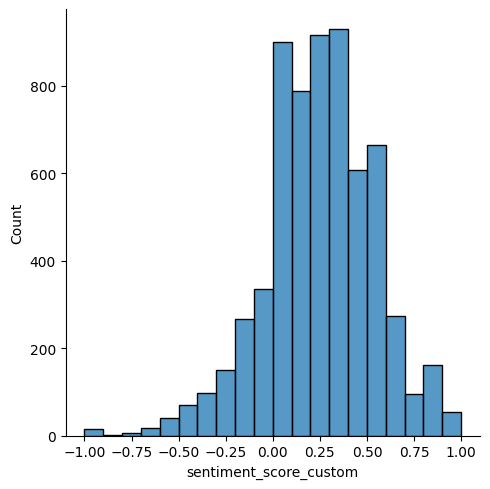

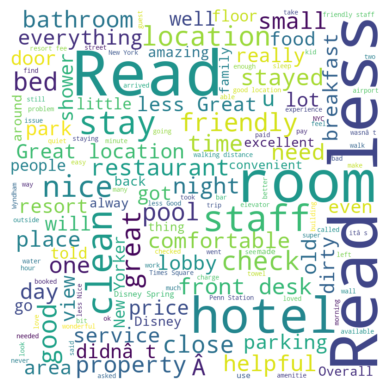

In [205]:


# Load the dataset
data = combined_df.copy()

# 1. Manual verification
sample_reviews = data.sample(n=20)
for index, row in sample_reviews.iterrows():
    print(f"Review: {row['review_english']}\nSentiment Score (Custom): {row['sentiment_score_custom']}\nSentiment Score (Vader): {row['sentiment_score_vader']}\n")

# 2. Cross-validation
X = data['review_english']
y = np.where(data['sentiment_score_custom'] >= 0, 1, 0)  # Convert sentiment scores to binary (positive or negative)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

y_pred = clf.predict(X_test_vectorized)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# 3. Visual inspection
sns.displot(data['sentiment_score_custom'], bins=20, kde=False)
plt.show()

wordcloud = WordCloud(background_color="white", width=800, height=800, max_words=150).generate(" ".join(data['review_english']))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [206]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6392 entries, 2019-08-20 to 2019-07-10
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   review                    6392 non-null   object  
 1   review_english            6392 non-null   object  
 2   iso_639-1_lang_code       6392 non-null   object  
 3   language_description      6392 non-null   object  
 4   sentiment_score_custom    6392 non-null   float64 
 5   sentiment_score_vader     6392 non-null   float64 
 6   sentiment_category        6392 non-null   category
 7   sentiment_category_vader  6392 non-null   category
dtypes: category(2), float64(2), object(4)
memory usage: 620.3+ KB


In [207]:
plt.savefig("displot.png")


<Figure size 640x480 with 0 Axes>

In [208]:
combined_df.head()

review  \
date                                                            
2019-08-20  i was very impressed with the resort great sta...   
2019-08-20  the rooms were nice the outside needs work als...   
2019-08-20  great location i have stayed at this hotel on ...   
2019-08-20  the hotel was adequate for my stay the strips ...   
2019-08-19  great location room was large and spacious par...   

                                               review_english  \
date                                                            
2019-08-20  I was very impressed with the resort.\n Great ...   
2019-08-20  The rooms were nice the outside needs work als...   
2019-08-20  Great location! I have stayed at this hotel on...   
2019-08-20  The hotel was adequate for my stay. The strips...   
2019-08-19  Great location, room was large and spacious. P...   

           iso_639-1_lang_code language_description  sentiment_score_custom  \
date                                                                          
2019-08-20                  en              English                    0.49   
2019-08-20                  en              English                    0.35   
2019-08-20                  en              English                    0.31   
2019-08-20                  en              English                    0.12   
2019-08-19                  en              English                    0.40   

            sentiment_score_vader sentiment_category sentiment_category_vader  
date                                                                           
2019-08-20                   0.93           positive                 positive  
2019-08-20                   0.88           positive                 positive  
2019-08-20                   0.62           positive                 positive  
2019-08-20                   0.18           positive                 positive  
2019-08-19                   0.93           positive                 positive

In [209]:
combined_df.to_csv('sentiment_Analysis_Result.csv')

In [210]:
combined_df.head()

review  \
date                                                            
2019-08-20  i was very impressed with the resort great sta...   
2019-08-20  the rooms were nice the outside needs work als...   
2019-08-20  great location i have stayed at this hotel on ...   
2019-08-20  the hotel was adequate for my stay the strips ...   
2019-08-19  great location room was large and spacious par...   
2019-08-19  all the options for fun were great do wish the...   
2019-08-19  old musty motel bath need an update asap read ...   
2019-08-19  loved the layout of the hotel and the relaxing...   
2019-08-19  my wife and i loved everything about it its cl...   
2019-08-19  rooms were very small was told i had a complim...   
2019-08-19  very clean and friendly and i love the locatio...   
2019-08-19  nice and comfortable good position near the st...   
2019-08-19  location was great lobby area was nice but roo...   
2019-08-19  quiet and at a great location good control at ...   
2019-08-19  el servicio super amables no todos en el buffe...   
2019-08-19  very nice and quiet and clean rooms we will re...   
2019-08-19  rooms were clean updated and beds were comfort...   
2019-08-19  the staff was exceptionally helpful and the pr...   
2019-08-19  it was great for what we needed a place to sle...   
2019-08-19  rooms were clean we had two room and were able...   
2019-08-18  a little off the beaten path but ultimately pl...   
2019-08-18  the room is tiny the building is old and worn ...   
2019-08-18  awesome location easy access to sights and sub...   
2019-08-18                                read more read less   
2019-08-18  the room did not seem clean there was some sor...   
2019-08-18  great location and friendly staff room with en...   
2019-08-17  real nice love to go back soon i will recommen...   
2019-08-17  beautiful hotel friendly helpful staff walking...   
2019-08-17  beautiful art deco building foyer is very orna...   
2019-08-17  en general excelente fantstica situacin dos pe...   
2019-08-17  really close to job interview nice morning bre...   
2019-08-17  les chambres familiales sont pratiques nous ti...   
2019-08-17  rooms very dirty and aged breakfast was of poo...   
2019-08-17  i have stayed for 5 nights great service affor...   
2019-08-17  the staff is excellent here this is always my ...   
2019-08-16  it was fine sink needed to be wiped down stain...   
2019-08-16  was a great place the room had ants but that c...   
2019-08-16  enjoyed our stay staff was welcoming and frien...   
2019-08-15  well kept up but where was my complimentary br...   
2019-08-15  location was around the transportation system ...   
2019-08-15  propret impeccable chambre refaite tous les jo...   
2019-08-15  good value we enjoyed our 4 day stay bicely ap...   
2019-08-15  the rooms was clean and i love they make break...   
2019-08-15  sent my parents on an anniversary trip they wa...   
2019-08-14  beautiful clean friendly staff variety of acti...   
2019-08-14  this property is advertised as being renovated...   
2019-08-14  vtuste mrite un sacr rafrachissement emplaceme...   
2019-08-14  loved the price location to the parks and the ...   
2019-08-14  el aire acondicionado goteaba y la alfombra es...   
2019-08-14  lunica cosa accettabile  stata la cortesia ric...   
2019-08-13  i liked that the staff was very nice and the p...   
2019-08-13  great price and lots to do cleanhospitality wa...   
2019-08-13  very smooth stay well surely coming back to th...   
2019-08-13  excellent location and great servicei highly r...   
2019-08-13  comodo per la posizione ma hotel fatiscente ca...   
2019-08-13  the rooms are terribly small almost claustroph...   
2019-08-13  they made us pay for gym facilities we didnt u...   
2019-08-13  does well what you expect it to comfy bed clea...   
2019-08-13  i stayed here for 2 nights this place is walka...   
2019-08-13  friendly staff clean property secure parking e...   
2019-08-12  todo excelent

In [211]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6392 entries, 2019-08-20 to 2019-07-10
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   review                    6392 non-null   object  
 1   review_english            6392 non-null   object  
 2   iso_639-1_lang_code       6392 non-null   object  
 3   language_description      6392 non-null   object  
 4   sentiment_score_custom    6392 non-null   float64 
 5   sentiment_score_vader     6392 non-null   float64 
 6   sentiment_category        6392 non-null   category
 7   sentiment_category_vader  6392 non-null   category
dtypes: category(2), float64(2), object(4)
memory usage: 620.3+ KB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample DataFrame with preprocessed and lemmatized text data
data = {'review_english': [["apple", "banana", "cherry"], ["banana", "orange", "grape"], ["apple", "cherry", "pear"]]}
df_similarity = pd.DataFrame(preprocessed_df['review_english'])

# Join the lemmatized words into a single string for each row
df_similarity['text_joined'] = df_similarity['review_english'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer object to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_similarity['text_joined'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(X, X)
print("Cosine Similarity:")
print(cosine_sim)

# Calculate Jaccard similarity
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    return intersection / union

jaccard_sim = [[jaccard_similarity(df_sim['review_english'].iloc[i], df_sim['review_english'].iloc[j]) for j in range(len(df_sim))] for i in range(len(df_sim))]
print("\nJaccard Similarity:")
print(jaccard_sim)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample DataFrame with preprocessed and lemmatized text data
# data = {'review_english': [["apple", "banana", "cherry"], ["banana", "orange", "grape"], ["apple", "cherry", "pear"]]}
df_sim = pd.DataFrame(prepprocessed_df)

# Join the lemmatized words into a single string for each row
df_sim['text_joined'] = df_sim['review_english'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer object to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_sim['text_joined'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(X, X)
print("Cosine Similarity:")
print(cosine_sim)

# Calculate Jaccard similarity
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    return intersection / union

jaccard_sim = [[jaccard_similarity(df_sim['review_english'].iloc[i], df_sim['review_english'].iloc[j]) for j in range(len(df_sim))] for i in range(len(df_sim))]
print("\nJaccard Similarity:")
print(jaccard_sim)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample DataFrame with preprocessed and lemmatized text data
# data = {'review_english': [["apple", "banana", "cherry"], ["banana", "orange", "grape"], ["apple", "cherry", "pear"]]}
df_similarity = pd.DataFrame(preprocessed_df['review_english'])

# Join the lemmatized words into a single string for each row
df_similarity['text_joined'] = df_similarity['review_english'].apply(lambda x: ' '.join(x))

# Create a CountVectorizer object to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_similarity['text_joined'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(X, X)
print("Cosine Similarity:")
print(cosine_sim)

# Calculate Jaccard similarity
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    return intersection / union

jaccard_sim = [[jaccard_similarity(df_similarity['review_english'].iloc[i], df_similarity['review_english'].iloc[j]) for j in range(len(df_similarity))] for i in range(len(df_similarity))]
print("\nJaccard Similarity:")
print(jaccard_sim)

Cosine Similarity:
[[1.         0.21516574 0.4114756  ... 0.16666667 0.14002801 0.18257419]
 [0.21516574 1.         0.29880715 ... 0.12909944 0.         0.14142136]
 [0.4114756  0.29880715 1.         ... 0.15430335 0.         0.08451543]
 ...
 [0.16666667 0.12909944 0.15430335 ... 1.         0.         0.45643546]
 [0.14002801 0.         0.         ... 0.         1.         0.0766965 ]
 [0.18257419 0.14142136 0.08451543 ... 0.45643546 0.0766965  1.        ]]


In [ ]:
preprocessed_df['review_english'].head()